# Figure 3: Intersection as function of dispersion parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
df = pd.read_csv('../../outputs/fig3e_1000sim_summary.csv')
df

,Unnamed: 0,Unnamed: 1,error_angle_mean,error_angle_median,error_angle_25,error_angle_75,error_angle_95,error_angle_std,error_angle_S2,error_vgp_scatter,...,N,n0,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers,total_simulations
0,0,0,3.771308,3.594938,2.240421,5.035025,7.375312,2.023242,18.312184,2.997391,...,20,5,30,30,0.0,0.50,G,NaN,True,1000
1,1,0,1.730438,1.648910,1.104129,2.261568,3.274322,0.869591,3.749846,1.273642,...,100,1,80,20,0.0,0.34,G,NaN,vandamme,1000
2,2,0,8.017145,6.780163,4.366665,10.443058,17.805335,5.227918,91.578404,38.481535,...,100,1,60,40,0.0,0.62,G,NaN,vandamme,1000
3,3,0,5.956192,4.968238,3.012804,7.761616,14.643731,4.244685,53.475554,27.775155,...,100,1,70,40,0.0,0.58,G,NaN,vandamme,1000
4,4,0,2.642335,2.486254,1.598886,3.473907,5.219749,1.425148,9.010949,2.356351,...,100,1,80,60,0.0,0.30,G,NaN,vandamme,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1795,0,2.614553,2.447370,1.594581,3.453479,5.070875,1.374982,8.724571,1.823777,...,20,5,40,10,0.0,0.30,G,NaN,True,1000
1796,1796,0,3.008607,2.862543,1.816675,3.980189,5.834281,1.573454,11.524994,1.943311,...,20,5,70,30,0.0,0.30,G,NaN,True,1000
1797,1797,0,3.824889,3.575288,2.178672,5.088705,7.684161,2.072258,18.919735,2.600436,...,20,5,70,40,0.0,0.58,G,NaN,True,1000
1798,1798,0,5.027593,4.746179,3.024909,6.557026,9.930260,2.625040,32.160635,3.128950,...,20,5,80,70,0.0,0.54,G,NaN,True,1000


Let's pick just one entry of the array (`kappa_within_site` and `latitude`) and see the different performances as a function of `outlier rate`.

In [4]:
def critical_outlier_rate(df_, kappa_within_site, site_lat):
    
    df_subset = df_[(df_.kappa_within_site==kappa_within_site) & (df_.site_lat==site_lat)]

    df1 = df_subset[df.n0==1].sort_values(by="outlier_rate")
    df5 = df_subset[df.n0==5].sort_values(by="outlier_rate")
    
    outlier_rate = df1.outlier_rate
    error_1 = df1.error_angle_mean.values
    error_5 = df5.error_angle_mean.values
    error_diff = error_1 - error_5
    
    roots = InterpolatedUnivariateSpline(outlier_rate, error_diff).roots()

    return roots[0]

In [5]:
all_kappa_within_site = sorted(np.unique(df.kappa_within_site))
all_site_lat = sorted(np.unique(df.site_lat))

n_kappa_within_site = len(all_kappa_within_site)
n_site_lat = len(all_site_lat)

Critical_outlier_rate = np.zeros((n_site_lat, n_kappa_within_site))

for i in range(n_site_lat):
    for j in range(n_kappa_within_site):
        _df_critical = pd.DataFrame({"site_lat": [all_site_lat[i]],
                                      "kappa_within_site": [all_kappa_within_site[j]],
                                      "critical": critical_outlier_rate(df, kappa_within_site=all_kappa_within_site[j], site_lat=all_site_lat[i])})
        if i==0 and j==0:
            df_critical = _df_critical
        else:
            df_critical = pd.concat([df_critical, _df_critical], axis=0, ignore_index=True)
        # Critical_outlier_rate[i,j] = critical_outlier_rate(df, kappa_within_site=all_kappa_within_site[j], site_lat=all_site_lat[i])

/tmp/ipykernel_3050/1095253769.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_subset[df.n0==1].sort_values(by="outlier_rate")
/tmp/ipykernel_3050/1095253769.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df_subset[df.n0==5].sort_values(by="outlier_rate")


In [6]:
np.round(df_critical.pivot('site_lat', 'kappa_within_site', 'critical'), decimals=2).sort_index(ascending=False)

kappa_within_site,10,20,30,40,50,60,70,80,90,100
site_lat,,,,,,,,,,
80,0.36,0.39,0.40,0.42,0.44,0.43,0.44,0.45,0.45,0.46
70,0.36,0.40,0.43,0.42,0.45,0.44,0.45,0.45,0.46,0.46
60,0.38,0.41,0.43,0.44,0.46,0.47,0.45,0.48,0.48,0.47
50,0.39,0.43,0.44,0.46,0.48,0.48,0.48,0.48,0.49,0.50
40,0.40,0.47,0.48,0.49,0.50,0.51,0.51,0.51,0.51,0.52
30,0.49,0.50,0.52,0.53,0.54,0.54,0.55,0.55,0.55,0.55
20,0.52,0.54,0.55,0.58,0.57,0.56,0.57,0.58,0.57,0.57
10,0.57,0.59,0.60,0.59,0.59,0.60,0.60,0.60,0.60,0.60
0,0.60,0.60,0.60,0.61,0.60,0.62,0.61,0.61,0.61,0.60


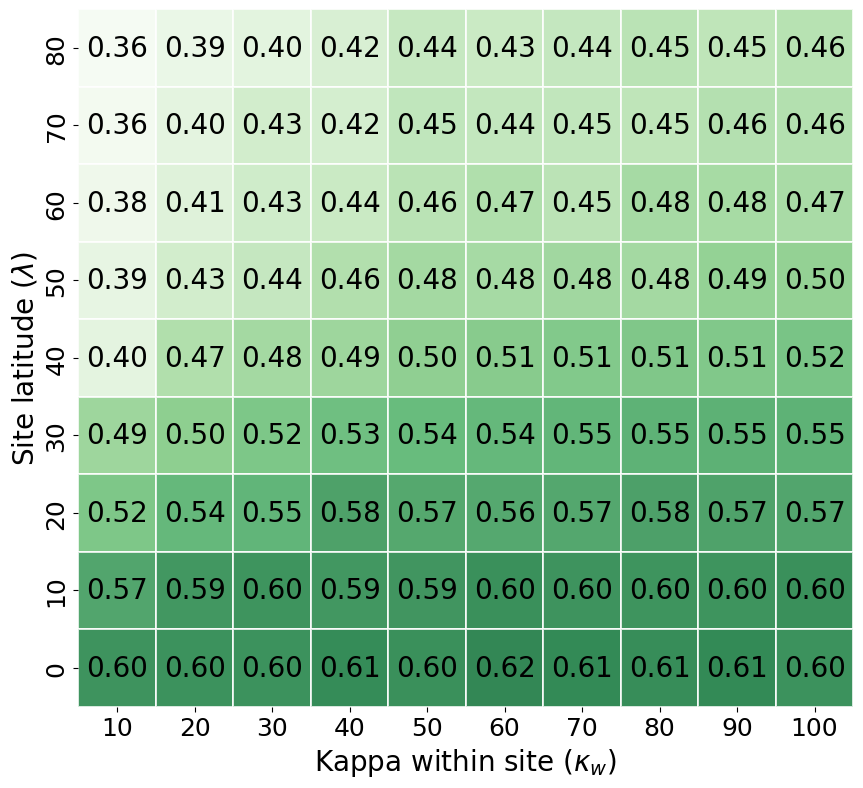

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df_critical.pivot('site_lat', 'kappa_within_site', 'critical').sort_index(ascending=False), 
            fmt=".2f",
            square=True, annot=True, linewidths=0.1, 
            vmin=0.35, vmax=0.65, cmap="Greens", alpha=0.8,
            cbar=False,
            cbar_kws = {'location': 'right', "boundaries":np.arange(0.35, 0.65, 0.02), "fraction": 0.04},
            annot_kws={"fontsize": 20, "color":'black'})
            # cmap=sns.color_palette("YlOrBr", as_cmap=True));

plt.ylabel("Site latitude ($\lambda$)", fontsize=20)
plt.xlabel("Kappa within site ($\kappa_w$)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.savefig("Figure3e.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3e.png", format="png", bbox_inches='tight')

### Figure 3f

In [8]:
df = pd.read_csv('../../outputs/fig3f_1000sim_summary.csv')
df = df.rename(columns={'k': 'n0'})

In [9]:
all_kappa_within_site = sorted(np.unique(df.kappa_within_site))
all_site_lat = sorted(np.unique(df.site_lat))

n_kappa_within_site = len(all_kappa_within_site)
n_site_lat = len(all_site_lat)

Critical_outlier_rate = np.zeros((n_site_lat, n_kappa_within_site))

for i in range(n_site_lat):
    for j in range(n_kappa_within_site):
        _df_critical = pd.DataFrame({"site_lat": [all_site_lat[i]],
                                      "kappa_within_site": [all_kappa_within_site[j]],
                                      "critical": critical_outlier_rate(df, kappa_within_site=all_kappa_within_site[j], site_lat=all_site_lat[i])})
        if i==0 and j==0:
            df_critical = _df_critical
        else:
            df_critical = pd.concat([df_critical, _df_critical], axis=0, ignore_index=True)

/tmp/ipykernel_3050/1095253769.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_subset[df.n0==1].sort_values(by="outlier_rate")
/tmp/ipykernel_3050/1095253769.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df_subset[df.n0==5].sort_values(by="outlier_rate")


In [10]:
df_critical.pivot('site_lat', 'kappa_within_site', 'critical')

kappa_within_site,10,20,30,40,50,60,70,80,90,100
site_lat,,,,,,,,,,
0,0.156380,0.165629,0.156434,0.159964,0.155416,0.171965,0.163982,0.154663,0.165004,0.164228
10,0.168659,0.169738,0.168751,0.165758,0.175887,0.172173,0.163978,0.163244,0.175941,0.178935
20,0.132851,0.169150,0.169066,0.168359,0.163420,0.177810,0.184387,0.178106,0.178417,0.175304
30,0.144295,0.169173,0.169671,0.192395,0.210313,0.195387,0.206105,0.192376,0.205377,0.201191
40,0.106997,0.197987,0.209623,0.196504,0.223931,0.204281,0.230277,0.217496,0.222616,0.210247
50,0.175222,0.227058,0.223659,0.235979,0.231177,0.229102,0.237134,0.230700,0.241577,0.236623
60,0.196765,0.253619,0.253192,0.238187,0.252754,0.267897,0.257686,0.260715,0.275921,0.261220
70,0.221986,0.260223,0.268968,0.252914,0.259466,0.286350,0.287681,0.284877,0.285631,0.300714
80,0.281501,0.298051,0.298636,0.318150,0.312047,0.289040,0.296003,0.309820,0.317483,0.283609


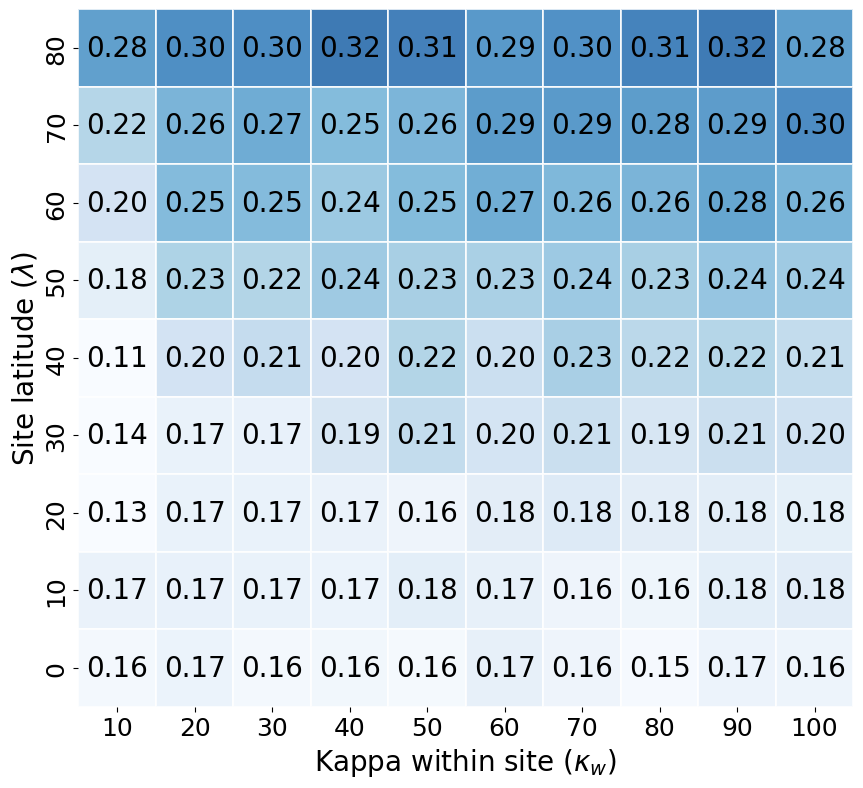

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_critical.pivot('site_lat', 'kappa_within_site', 'critical').sort_index(ascending=False), 
            fmt=".2f",
            square=True, annot=True, linewidths=0.1, 
            vmin=0.15, vmax=0.35, cmap="Blues", alpha=0.8,
            cbar=False,
            cbar_kws = {'location': 'right', "boundaries":np.arange(0.15, 0.30, 0.02), "fraction": 0.04},
            annot_kws={"fontsize": 20, "color":'black'})
            # cmap=sns.color_palette("YlOrBr", as_cmap=True));

plt.ylabel("Site latitude ($\lambda$)", fontsize=20)
plt.xlabel("Kappa within site ($\kappa_w$)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.savefig("Figure3f.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3f.png", format="png", bbox_inches='tight')